In [1]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast
import graphviz # visualize decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

## Load dataset

In [2]:
ori_df = pd.read_csv('fitbod_TengYue_20200807-185243.csv', header=0, encoding='utf-8')
ori_df.head()

,Date,workoutId,exerciseId,singleSetId,exerciseName,reps,weight,fake_user_id
0,2019-04-17,kKn9tY3OtX,mvkMgAdecH,pJeNpRf97k,Dumbbell Shoulder Press,8,11.339823,fake_id_616
1,2019-10-26,CcTDXFzFCs,dXqYJgUYO6,rIaR4UvGw4,Deadlift,12,40.823362,fake_id_633
2,2019-06-17,hgFE0ZL5uW,mvkMgAdecH,IxuBmOQ0Ke,Dumbbell Shoulder Press,12,11.339823,fake_id_606
3,2019-09-02,xsACQH8eET,h85ZOw37Wc,eL2hci1qAJ,Dumbbell Bench Press,8,24.947610,fake_id_670
4,2019-06-13,yAES9CrsUk,dXqYJgUYO6,RotdJXeEEy,Deadlift,4,120.000000,fake_id_597


In [3]:
ori_df.info()
# there is no missing or null values in this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32186 entries, 0 to 32185
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          32186 non-null  object 
 1   workoutId     32186 non-null  object 
 2   exerciseId    32186 non-null  object 
 3   singleSetId   32186 non-null  object 
 4   exerciseName  32186 non-null  object 
 5   reps          32186 non-null  int64  
 6   weight        32186 non-null  float64
 7   fake_user_id  32186 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ MB


In [4]:
ori_df.describe(include='all')

,Date,workoutId,exerciseId,singleSetId,exerciseName,reps,weight,fake_user_id
count,32186,32186,32186,32186,32186,32186.000000,32186.000000,32186
unique,980,6893,9,32090,9,NaN,NaN,111
top,2019-09-23,qq6S6sNjOa,mnwUcsbS9T,rFxShbpcBa,Barbell Bench Press,NaN,NaN,fake_id_671
freq,120,20,5023,2,5023,NaN,NaN,1680
mean,NaN,NaN,NaN,NaN,NaN,8.487759,40.574184,NaN
std,NaN,NaN,NaN,NaN,NaN,3.794617,32.851475,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,0.045359,NaN
25%,NaN,NaN,NaN,NaN,NaN,5.000000,15.875752,NaN
50%,NaN,NaN,NaN,NaN,NaN,8.000000,26.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,10.000000,61.235043,NaN


In [5]:
# try to understand the definition of workoutId
ori_df['workoutId'].value_counts()

qq6S6sNjOa    20
W6hvwfL2QM    19
NZWuQfoNLk    19
n6D5lm8nHD    19
rWWZfJPOUD    18
              ..
MN9oZ720dH     1
X4xViVTMhJ     1
zNBCrOLnu9     1
uykFpT9tJH     1
hyRWmlwoYi     1
Name: workoutId, Length: 6893, dtype: int64

In [6]:
ori_df[ori_df['workoutId'] == 'Cb6uwdMysk'].describe(include='all')

,Date,workoutId,exerciseId,singleSetId,exerciseName,reps,weight,fake_user_id
count,18,18,18,18,18,18.000000,18.000000,18
unique,1,1,3,18,3,NaN,NaN,1
top,2019-09-05,Cb6uwdMysk,G1mxtZtEs5,s7fksNN2bM,Back Squat,NaN,NaN,fake_id_616
freq,18,18,9,1,9,NaN,NaN,18
mean,NaN,NaN,NaN,NaN,NaN,7.777778,55.691129,NaN
std,NaN,NaN,NaN,NaN,NaN,2.941699,34.388543,NaN
min,NaN,NaN,NaN,NaN,NaN,3.000000,11.339823,NaN
25%,NaN,NaN,NaN,NaN,NaN,5.500000,13.607787,NaN
50%,NaN,NaN,NaN,NaN,NaN,8.000000,61.235043,NaN
75%,NaN,NaN,NaN,NaN,NaN,10.750000,83.914688,NaN


In [7]:
# try to understand the definition of singleSetId
ori_df['singleSetId'].value_counts()

rFxShbpcBa    2
yHkSg9QTeY    2
Z6k02C0L1b    2
yPRYxA6Fo0    2
F6khwDLzPp    2
             ..
o7MUHpcpS1    1
posSFtAa0A    1
6skqGMVeYh    1
uwaAVm6OVE    1
wjpxiPEF69    1
Name: singleSetId, Length: 32090, dtype: int64

In [8]:
ori_df[ori_df['singleSetId'] == 'e2i1lXUI2G']

,Date,workoutId,exerciseId,singleSetId,exerciseName,reps,weight,fake_user_id
8119,2019-01-29,igQdrBYan2,dXqYJgUYO6,e2i1lXUI2G,Deadlift,6,85.275467,fake_id_690
10168,2019-01-29,4CWQv5zDUN,dXqYJgUYO6,e2i1lXUI2G,Deadlift,6,85.275467,fake_id_690


**Analysis:** 
1. Based on the dataset statistics, there is ``no missing value`` in this dataset; all columns are not a primary(unique) key for this table.
2. After examing the ``singleSetId`` column, I notice that, for most records it is an unique key; 
    for 96 records, they are the same as another corresponding record who has the same singleSetId and other columns, but a different workoutID. These might be wrong data which needs validation or to be deleted.
3. After exploring the different columns, I find the initial definition for these columns:

| Column name | Explanation|
| :- | :- |
| workoutId | a work out is when a user does a set of exercises in a row in a day |
| singleSetId | a single set is a set of movements with a certain number of repeats and weight |
| reps | repeat times of an exercise in one single set |
| weight | the weight of a lift / push up |

## Exploratory Data Analysis

In this section, I will analyze the dataset from the following aspects:
* What were the Workout Dates / Days
* What Exercises were they dong?
* User-level Analysis
    * Daily Workout Times vs. Total Workout Times 
    * WAU and MAU

Note: the following analysis assumes that the dataset is representative.

### Workout Day Analysis

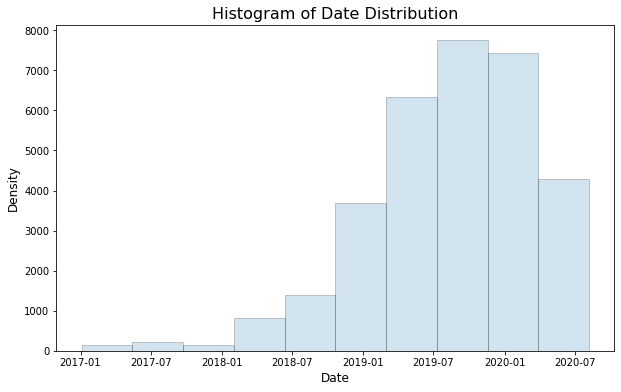

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
pd.to_datetime(ori_df['Date']).hist(ax=ax,grid=False, **hist_kws)
ax.set_title("Histogram of Date Distribution",fontsize=16)
ax.set_xlabel("Date", fontsize = 12)
ax.set_ylabel("Density", fontsize = 12)
plt.show()

In [10]:
# show exercise weekday
ori_df['Date'] = pd.to_datetime(ori_df['Date'])
ts_df = ori_df.set_index('Date')
day_names = ts_df.index.day_name()

weekday = ts_df.groupby(day_names)['singleSetId'].count()[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
weekday

Date
Monday       4895
Tuesday      5290
Wednesday    5350
Thursday     4814
Friday       4426
Saturday     4195
Sunday       3216
Name: singleSetId, dtype: int64

**Analysis:** 
* More data points are located between 2019 and 2020, indicating that more people are using the APP to exercise.
* More people work out on weekdays instead of weekends.

### Exercise Analysis

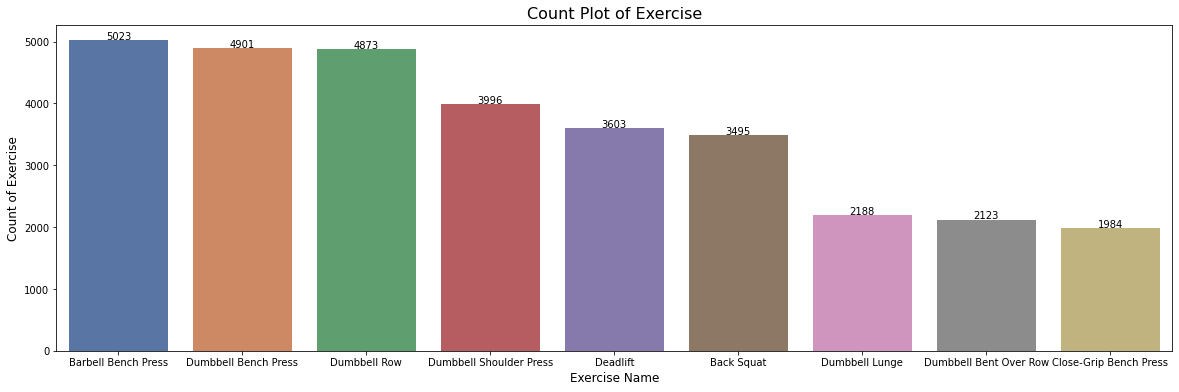

In [11]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.countplot(ori_df['exerciseName'], 
                      order = ori_df['exerciseName'].value_counts().index, palette="deep",ax=ax)
ax.set_title("Count Plot of Exercise",fontsize=16)
ax.set_xlabel("Exercise Name", fontsize = 12)
ax.set_ylabel("Count of Exercise", fontsize = 12)

#data label
labels=ori_df['exerciseName'].value_counts().index
values=ori_df['exerciseName'].value_counts().values

for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 10, values[i],ha="center")


plt.show()

**Analysis:**
* The most popular three exercises are Barbell Bench Press, Dumbbell Bench Press and Dumbbell Row. 
* And the least popular three are Dumbbell Lunge, Dumbbell Bent Over Row and Close-Grip Bench Press.

### a. Repeats

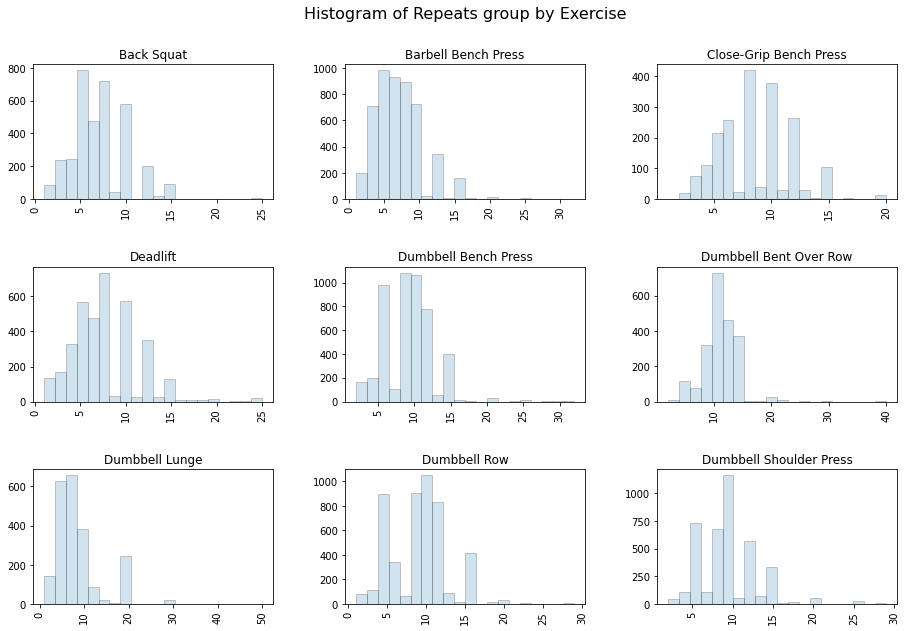

In [12]:
fig, ax = plt.subplots(figsize=(15, 10))
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
ax.set_title("Reps Distribution",fontsize=16)
ax.set_xlabel("Reps", fontsize = 12)
ax.set_ylabel("Density", fontsize = 12)
ori_df['reps'].hist(ax=ax,by = ori_df['exerciseName'],bins = 20, **hist_kws)
plt.suptitle('Histogram of Repeats group by Exercise', fontsize=16)

plt.show()

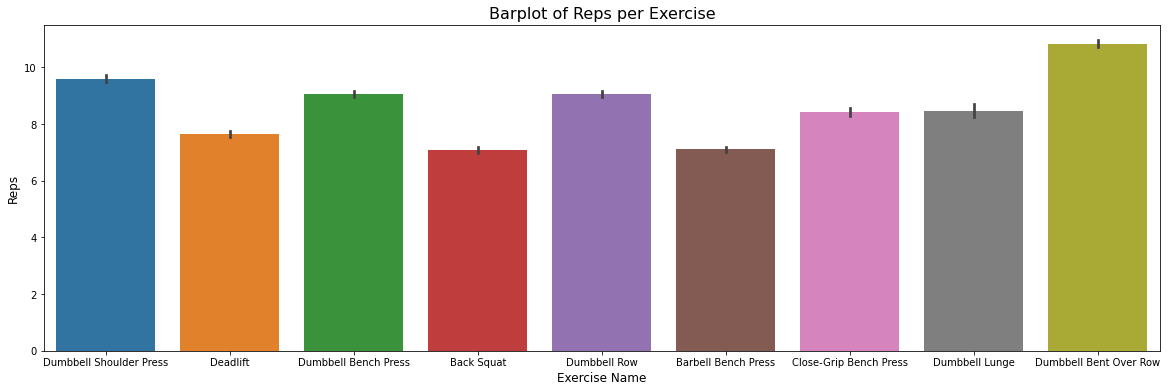

In [13]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x='exerciseName', y='reps', data=ori_df, ax=ax)
ax.set_title('Barplot of Reps per Exercise', fontsize=16)
ax.set_xlabel("Exercise Name", fontsize = 12)
ax.set_ylabel("Reps", fontsize = 12)
plt.show()

**Analysis:**
* In the first plot, for most exercises, the distribution of Repeat times is centered around 5-10, with a very few records of repeat times over 20. 
* The second plot shows the average repeats for all users. Initial recommendations of repeat times for each exercise can be set accordingly.

### b. Weight

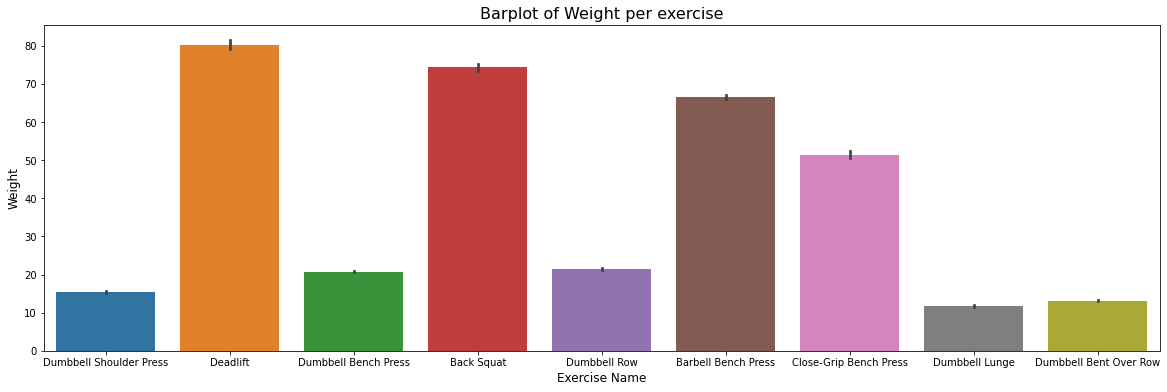

In [14]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x='exerciseName', y='weight', data=ori_df, ax=ax)
ax.set_title('Barplot of Weight per exercise', fontsize=16)
ax.set_xlabel("Exercise Name", fontsize = 12)
ax.set_ylabel("Weight", fontsize = 12)
plt.show()

**Analysis:**
* This plot shows the average weight for each exercise. Initial recommendations of weight for each exercise can be set accordingly.
* We can learn the user habits better through customer segmentation. 

### Heatmap

The correlation of Repeats and Weight is not high (-0.38)

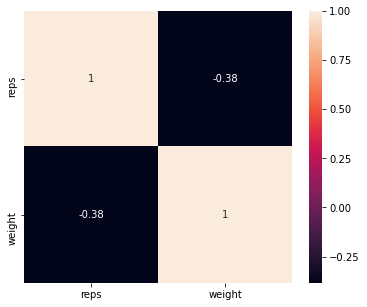

In [15]:
corr = ori_df[['reps','weight']].corr()

fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(corr, ax=ax,annot=True)
plt.show()

After analyzing the date and Exercise, to further understand our user and to give recommendations, we need to segment our users.

### User-level Analysis

To simplify the analysis, I assume that the first date appeared in the dataset is the first logging date for a user.

In [16]:
# create a dataframe for user-level aggregated data
df = pd.DataFrame()
df['first_date'] = ori_df.groupby(['fake_user_id']).min()['Date']
df['latest_date'] = ori_df.groupby(['fake_user_id']).max()['Date']
# engineer for second latest exercise day
ori_df['rank'] = ori_df.groupby(['fake_user_id'])['Date'].rank(method='dense', ascending=False)
df['second_latest_date'] = ori_df[ori_df['rank']==2].groupby(['fake_user_id'])['Date'].max()

df['days_interval'] = df['latest_date'] - df['second_latest_date']
df['active_days'] = ori_df.groupby(['fake_user_id','Date']).count()['singleSetId'].unstack(level=0).count()
df['weight'] = round(ori_df.groupby(['fake_user_id']).mean()['weight'],0) # mean
df['reps'] = round(ori_df.groupby(['fake_user_id']).mean()['reps'],0) # mean
df = df.reset_index()
df.head()

,fake_user_id,first_date,latest_date,second_latest_date,days_interval,active_days,weight,reps
0,fake_id_592,2018-01-24,2020-07-10,2020-07-01,9 days,130,47.0,8.0
1,fake_id_593,2019-10-11,2020-08-05,2020-08-01,4 days,95,62.0,7.0
2,fake_id_594,2019-12-03,2020-08-05,2020-07-12,24 days,47,17.0,11.0
3,fake_id_595,2019-01-11,2020-08-04,2020-08-03,1 days,177,58.0,8.0
4,fake_id_596,2019-12-12,2020-02-15,2020-02-12,3 days,12,19.0,6.0


In [17]:
# construct the exercise_count columns for each user 
df['exercise_count'] = 0
grouped = ori_df.groupby(['fake_user_id','exerciseName']).count()['Date'].reset_index()

for index_1, row_1 in df.iterrows():
    counter = Counter() # count the times for each user and each exercise
    for index, row in grouped.iterrows():
        if row_1['fake_user_id'] == row['fake_user_id']:
            counter[row['exerciseName']] = row['Date']
    df.loc[index_1, 'exercise_count'] = str(counter.most_common(3)) # keep 3 most common exercises for a user

In [18]:
# separate into three columns
df['exercise_count'] =  df['exercise_count'].apply(lambda x: ast.literal_eval(x) if x is not np.nan else [])
df['exercise1'] = df['exercise_count'].apply(lambda x: x[0][0])
df['exercise2'] = df['exercise_count'].apply(lambda x: x[1][0] if len(x)>1  else np.nan)
df['exercise3'] = df['exercise_count'].apply(lambda x: x[2][0] if len(x)>2 else np.nan)

In [19]:
df.head()

,fake_user_id,first_date,latest_date,second_latest_date,days_interval,active_days,weight,reps,exercise_count,exercise1,exercise2,exercise3
0,fake_id_592,2018-01-24,2020-07-10,2020-07-01,9 days,130,47.0,8.0,"[(Deadlift, 169), (Dumbbell Bench Press, 155),...",Deadlift,Dumbbell Bench Press,Dumbbell Row
1,fake_id_593,2019-10-11,2020-08-05,2020-08-01,4 days,95,62.0,7.0,"[(Barbell Bench Press, 125), (Close-Grip Bench...",Barbell Bench Press,Close-Grip Bench Press,Back Squat
2,fake_id_594,2019-12-03,2020-08-05,2020-07-12,24 days,47,17.0,11.0,"[(Dumbbell Row, 40), (Dumbbell Bench Press, 38...",Dumbbell Row,Dumbbell Bench Press,Dumbbell Bent Over Row
3,fake_id_595,2019-01-11,2020-08-04,2020-08-03,1 days,177,58.0,8.0,"[(Back Squat, 171), (Dumbbell Row, 153), (Clos...",Back Squat,Dumbbell Row,Close-Grip Bench Press
4,fake_id_596,2019-12-12,2020-02-15,2020-02-12,3 days,12,19.0,6.0,"[(Close-Grip Bench Press, 18), (Barbell Bench ...",Close-Grip Bench Press,Barbell Bench Press,Dumbbell Shoulder Press


#### User Daily Workout Times vs. User Total Workout Times

In [20]:
# user daily workout times
# max workout times among all the user
print("Max daily workout times for all users: ",ori_df.groupby(['fake_user_id','Date']).count()['singleSetId'].unstack(level=0).mean().max())
# min workout times among all the user
print("Min daily workout times for all users: ",ori_df.groupby(['fake_user_id','Date']).count()['singleSetId'].unstack(level=0).mean().min())
# average workout times among all the user
print("Average daily workout times for all users: ",round(ori_df.groupby(['fake_user_id','Date']).count()['singleSetId'].unstack(level=0).mean().mean(),2))
# ori_df.groupby(['fake_user_id','Date'])['singleSetId'].size().mean()

Max daily workout times for all users:  9.333333333333334
Min daily workout times for all users:  2.875
Average daily workout times for all users:  4.69


In [21]:
# max workout times among all the user
print("Max workout times for all users: ",ori_df.groupby(['fake_user_id']).count()['singleSetId'].max())
# min workout times among all the user
print("Min workout times for all users: ",ori_df.groupby(['fake_user_id']).count()['singleSetId'].min())
# average workout times among all the user
print("Average workout times for all users: ",round(ori_df.groupby(['fake_user_id']).count()['singleSetId'].mean(),0))

Max workout times for all users:  1680
Min workout times for all users:  5
Average workout times for all users:  290.0


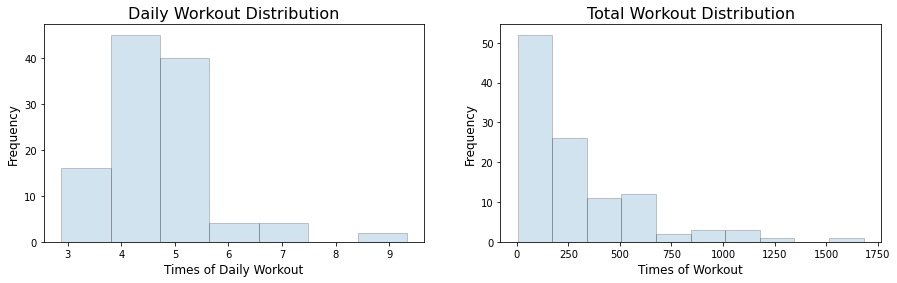

In [22]:
fig, ax = plt.subplots(1,2, figsize=(15, 4))
hist_kws={'ax':ax[0], 'grid':False, 'bins':7, 'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
ori_df.groupby(['fake_user_id','Date']).count()['singleSetId'].unstack(level=0).mean().hist(**hist_kws)
ax[0].set_title("Daily Workout Distribution",fontsize=16)
ax[0].set_xlabel("Times of Daily Workout", fontsize = 12)
ax[0].set_ylabel("Frequency", fontsize = 12)

hist_kws={'ax':ax[1], 'grid':False,'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
ori_df.groupby(['fake_user_id']).count()['singleSetId'].hist(**hist_kws)
ax[1].set_title("Total Workout Distribution",fontsize=16)
ax[1].set_xlabel("Times of Workout", fontsize = 12)
ax[1].set_ylabel("Frequency", fontsize = 12)

plt.show()


#### Adding Quit Information

In [23]:
# the days interval of the last two exercise usually is less than 15 days
df['days_interval'].describe()

count                        108
mean            17 days 05:20:00
std      34 days 23:36:05.427412
min              1 days 00:00:00
25%              2 days 00:00:00
50%              5 days 00:00:00
75%             14 days 00:00:00
max            205 days 00:00:00
Name: days_interval, dtype: object

According to the results above, combined with domain knowledge, I set the attrition rate criteria to be one month inactive.

In [24]:
# choose about one month as the criteria for quitting exercise on Fitbod
df.loc[df['latest_date'] < pd.to_datetime('2020-07-01'),'quit_date'] = df['latest_date']

In [25]:
# Separate stay and quit data
quit_data = df[~df['quit_date'].isnull()]
stay_data = df[df['quit_date'].isnull()]

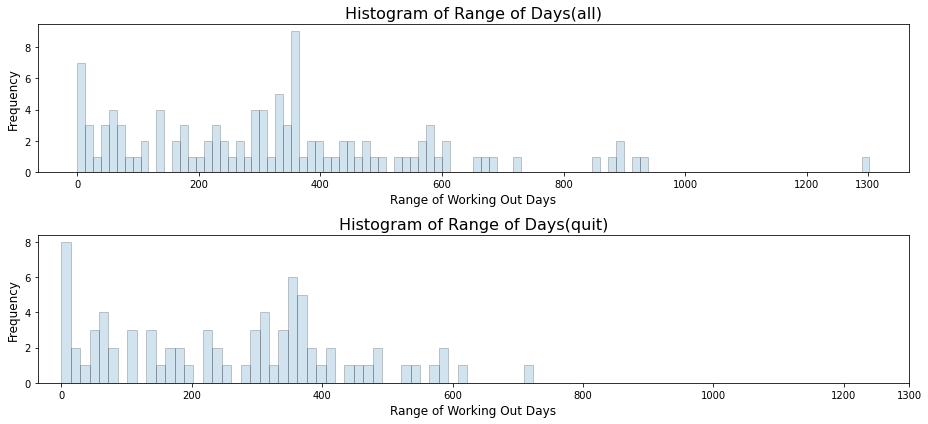

In [26]:
# the range of days user stay on the app from loggin to quit
range_days = np.array(list(map(lambda x: x.days, df['latest_date'] - df['first_date'])))
range_days_quit = np.array(list(map(lambda x: x.days, quit_data['latest_date'] - quit_data['first_date'])))


hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(2, 1, figsize=(13, 6))

sns.distplot(range_days, bins=100, kde=False, ax=ax[0], hist_kws=hist_kws)
ax[0].set_xticks([0, 200, 400, 600, 800, 1000, 1200, 1300])
ax[0].set_title('Histogram of Range of Days(all)', fontsize=16)
ax[0].set_xlabel('Range of Working Out Days', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)

sns.distplot(range_days_quit, bins=50, kde=False, ax=ax[1], hist_kws=hist_kws)
ax[1].set_xticks([0, 200, 400, 600, 800, 1000, 1200, 1300])
ax[1].set_title('Histogram of Range of Days(quit)', fontsize=16)
ax[1].set_xlabel('Range of Working Out Days', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)
plt.tight_layout()

plt.show()

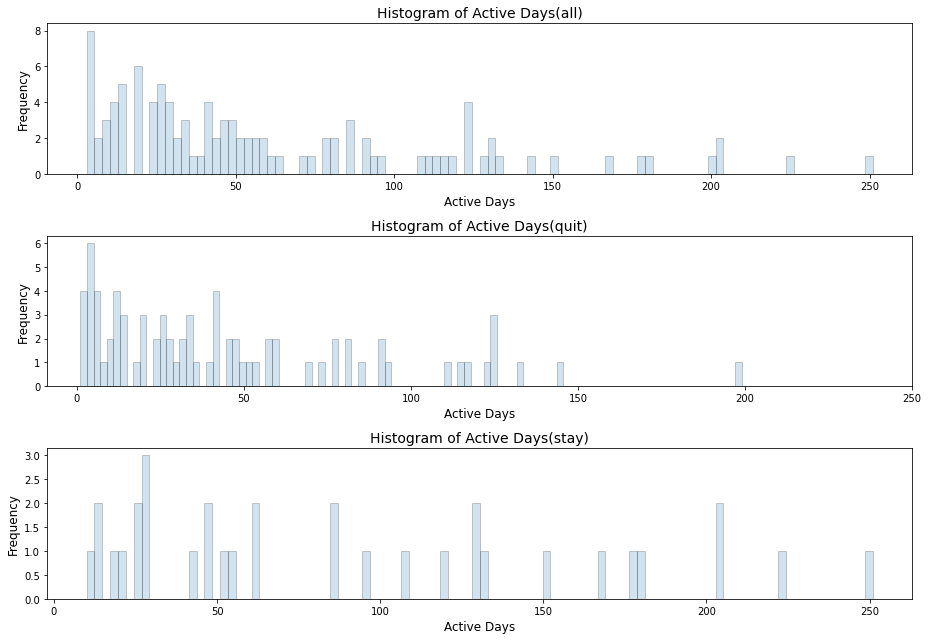

In [47]:
# user active working out days

hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(3, 1, figsize=(13, 9))

sns.distplot(df['active_days'], bins=100, kde=False, ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Histogram of Active Days(all)', fontsize=14)
ax[0].set_xlabel('Active Days', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)

sns.distplot(quit_data['active_days'], bins=100, kde=False, ax=ax[1], hist_kws=hist_kws)
ax[1].set_xticks([0, 50, 100, 150, 200, 250])
ax[1].set_title('Histogram of Active Days(quit)', fontsize=14)
ax[1].set_xlabel('Active Days', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)
plt.tight_layout()

sns.distplot(stay_data['active_days'], bins=100, kde=False, ax=ax[2], hist_kws=hist_kws)
ax[2].set_title('Histogram of Active Days(stay)', fontsize=14)
ax[2].set_xlabel('Active Days', fontsize=12)
ax[2].set_ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

**Analysis:**
* The first plot collection shows that, most users who has used the APP longer than 2 years will not quit.
* The second plot collection shows that, most users who quit have a lower active days compared to stayed users.
* We can draw a conclusion that we should try to increase their "stickness" as much as possible.

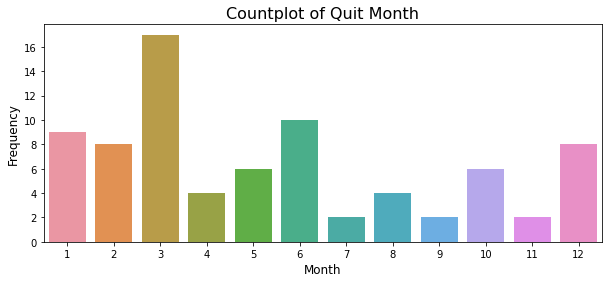

In [29]:
# Month for quiting
quit_month = np.array(list(map(lambda x: x.month, quit_data['quit_date'])))

fig, ax = plt.subplots(figsize=(10, 4))
sns.countplot(quit_month, ax=ax)
ax.set_title('Countplot of Quit Month', fontsize=16)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show()

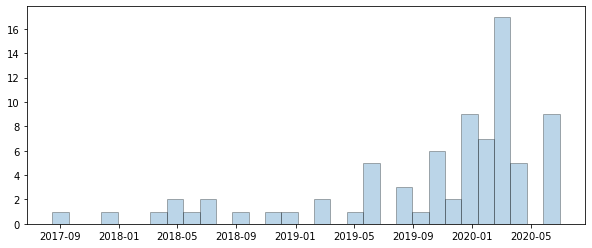

In [30]:
quit_data['latest_date'].hist(figsize=(10, 4), edgecolor='black', alpha= 0.3, bins=31, grid=False)
plt.show()

**Analysis:**
* To go deeper, We can see that, a lot of users quit this March, this may ascribe to the closure of gyms since the outbreak of Covid-19.

### Weekly Active Users and Monthly Active Users

We may want to know the active user for each week and month, these can be important metrics for a mobile app.

In [31]:
# Weekly Active Users
week_df = ori_df.copy()
week_df['week_date'] = pd.to_datetime(week_df['Date']) - pd.to_timedelta(7, unit='d')
week_df = week_df.groupby([pd.Grouper(key='week_date', freq='W-MON'), 'fake_user_id'])['fake_user_id'].count().unstack(level=0).count()
week_df = week_df.to_frame('WAU').reset_index()
week_df

,week_date,WAU
0,2017-01-02,1
1,2017-02-13,1
2,2017-02-20,2
3,2017-02-27,3
4,2017-03-06,2
...,...,...
166,2020-07-06,19
167,2020-07-13,20
168,2020-07-20,21
169,2020-07-27,24


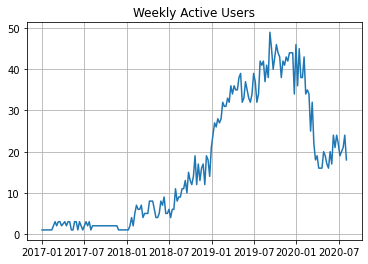

In [48]:
plt.plot(week_df['week_date'],week_df['WAU'])
plt.title('Weekly Active Users')
plt.grid()
plt.show()

In [33]:
# Monthly Active Users
mon_df = ori_df.copy()
mon_df = mon_df.groupby([pd.Grouper(key='Date', freq='1M'),'fake_user_id'])['fake_user_id'].count().unstack(level=0).count() # groupby each 1 month
mon_df = mon_df.to_frame('MAU').reset_index()
mon_df.tail()

,Date,MAU
39,2020-04-30,25
40,2020-05-31,28
41,2020-06-30,34
42,2020-07-31,32
43,2020-08-31,22


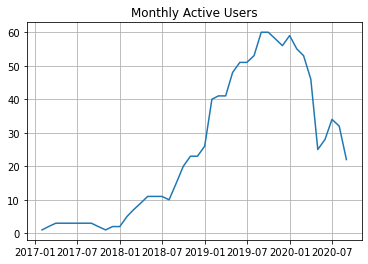

In [49]:
plt.plot(mon_df['Date'],mon_df['MAU'])
plt.title('Monthly Active Users')
plt.grid()
plt.show()

## ML Modeling

In this section, I will apply a ``Decision Tree`` Model to predict whether a user will quit using our APP or not, and show the possible causes of a user lost.

Decision Tree is used since it can work for small data and it is easy to explain.

At this moment, the model may not be accurate because of the limited dimensions and quantity of the data. We can improve and generalize the model as the data becomes more complete.

### Decision Tree Model

In [35]:
# binary label for quit
quit = df['quit_date'].isnull()
df['quit'] = 1 - quit.astype(int)

df.head()

,fake_user_id,first_date,latest_date,second_latest_date,days_interval,active_days,weight,reps,exercise_count,exercise1,exercise2,exercise3,quit_date,quit
0,fake_id_592,2018-01-24,2020-07-10,2020-07-01,9 days,130,47.0,8.0,"[(Deadlift, 169), (Dumbbell Bench Press, 155),...",Deadlift,Dumbbell Bench Press,Dumbbell Row,NaT,0
1,fake_id_593,2019-10-11,2020-08-05,2020-08-01,4 days,95,62.0,7.0,"[(Barbell Bench Press, 125), (Close-Grip Bench...",Barbell Bench Press,Close-Grip Bench Press,Back Squat,NaT,0
2,fake_id_594,2019-12-03,2020-08-05,2020-07-12,24 days,47,17.0,11.0,"[(Dumbbell Row, 40), (Dumbbell Bench Press, 38...",Dumbbell Row,Dumbbell Bench Press,Dumbbell Bent Over Row,NaT,0
3,fake_id_595,2019-01-11,2020-08-04,2020-08-03,1 days,177,58.0,8.0,"[(Back Squat, 171), (Dumbbell Row, 153), (Clos...",Back Squat,Dumbbell Row,Close-Grip Bench Press,NaT,0
4,fake_id_596,2019-12-12,2020-02-15,2020-02-12,3 days,12,19.0,6.0,"[(Close-Grip Bench Press, 18), (Barbell Bench ...",Close-Grip Bench Press,Barbell Bench Press,Dumbbell Shoulder Press,2020-02-15,1


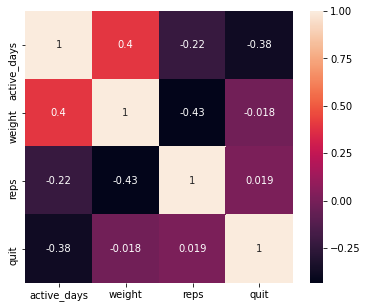

In [36]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(6, 5))
# pass the axis to draw on
sns.heatmap(corr, ax=ax,annot=True)
plt.show()

In [37]:
# delete rows for missing data
df = df.dropna(subset=['exercise2','exercise3'])

In [39]:
# use label encoder for categorical features
le = LabelEncoder()
train_x = df[['weight', 'reps', 'active_days']]
train_x['exercise1'] = le.fit_transform(df['exercise1'])
train_x['exercise2'] = le.transform(df['exercise2'])
train_x['exercise3'] = le.transform(df['exercise3'])
train_y = df['quit'].values

train_x.head()

,weight,reps,active_days,exercise1,exercise2,exercise3
0,47.0,8.0,130,3,4,7
1,62.0,7.0,95,1,2,0
2,17.0,11.0,47,7,4,5
3,58.0,8.0,177,0,7,2
4,19.0,6.0,12,2,1,8


In [40]:
# use cross-validation to calculate f1-score
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, random_state=42)
scores = cross_val_score(clf, train_x, train_y, cv=10,scoring='f1_macro')

print("f1 score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

f1 score: 0.59 (+/- 0.33)


**Note:**
* The reason for using cross validation is that the data size is small (111 users); we don't have enough data as training and testing. In the normal process, it is always important to have a training set, a validation set and a test set.
* The reason for using F1 score instead of accuracy is that we have imbalanced data (78 quit, 33 stay), so we want a more reasonable evaluation metric.

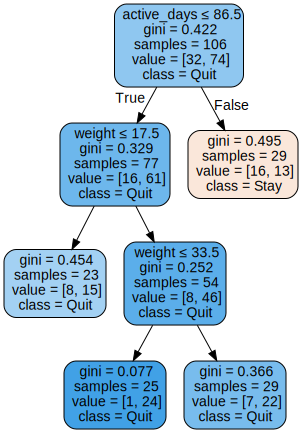

In [41]:
# Tree Visualization
clf = clf.fit(X=train_x, y=train_y)
features = list(train_x.columns)
targets = ['Stay', 'Quit']
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=features, class_names=targets, filled=True, rounded=True, special_characters=True, )  
graph = graphviz.Source(dot_data)
graph

In [42]:
# Feature importance
importance = sorted(zip(features, clf.feature_importances_), key=lambda x:x[1], reverse=True)
for feature, val in importance:
    print('{0:10s} | {1:.5f}'.format(feature, val))

active_days | 0.67724
weight     | 0.32276
reps       | 0.00000
exercise1  | 0.00000
exercise2  | 0.00000
exercise3  | 0.00000


**Model Results:**
* We can see from the tree plot that the only predictive attribute is active days.
* This is because we have only limited data and features in this dataset.
* The repeat times and exercise have no influence on user lost.

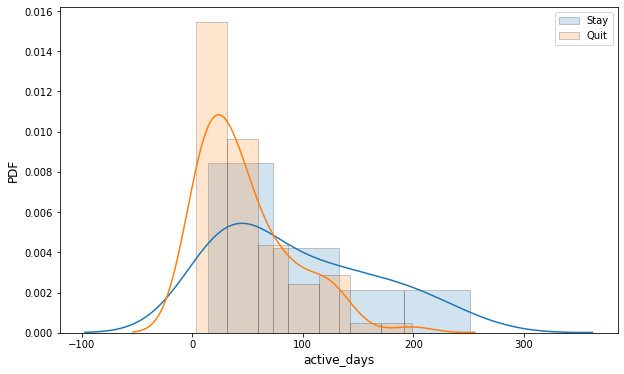

In [43]:
# Visualization
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(df[df['quit']==0]['active_days'], 
             label='Stay', ax=ax, hist_kws=hist_kws)
sns.distplot(df[df['quit']==1]['active_days'], 
             label='Quit', ax=ax, hist_kws=hist_kws)
ax.set_xlabel('active_days', fontsize=12)
ax.set_ylabel('PDF', fontsize=12)
ax.legend()
plt.show()

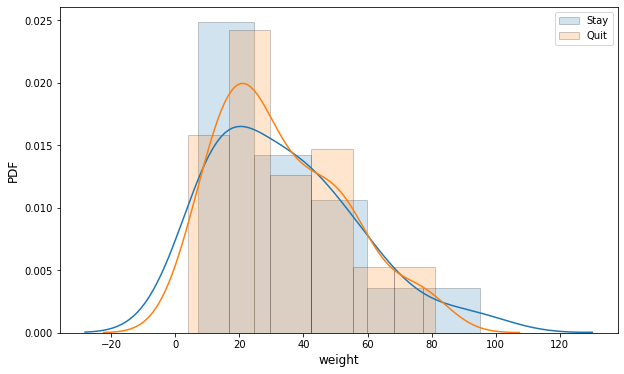

In [44]:
# Visualization
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(df[df['quit']==0]['weight'], 
             label='Stay', ax=ax, hist_kws=hist_kws)
sns.distplot(df[df['quit']==1]['weight'], 
             label='Quit', ax=ax, hist_kws=hist_kws)
ax.set_xlabel('weight', fontsize=12)
ax.set_ylabel('PDF', fontsize=12)
ax.legend()
plt.show()

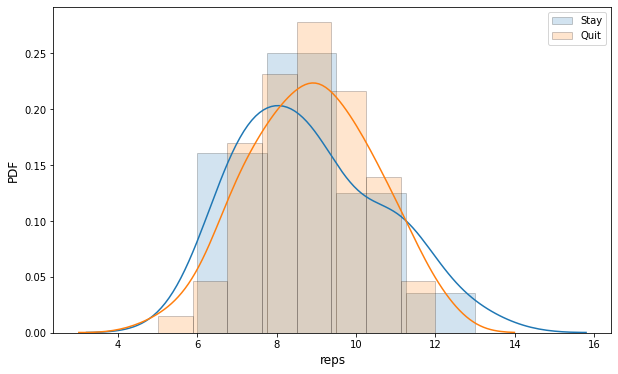

In [45]:
# Visualization
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(df[df['quit']==0]['reps'], 
             label='Stay', ax=ax, hist_kws=hist_kws)
sns.distplot(df[df['quit']==1]['reps'], 
             label='Quit', ax=ax, hist_kws=hist_kws)
ax.set_xlabel('reps', fontsize=12)
ax.set_ylabel('PDF', fontsize=12)
ax.legend()
plt.show()

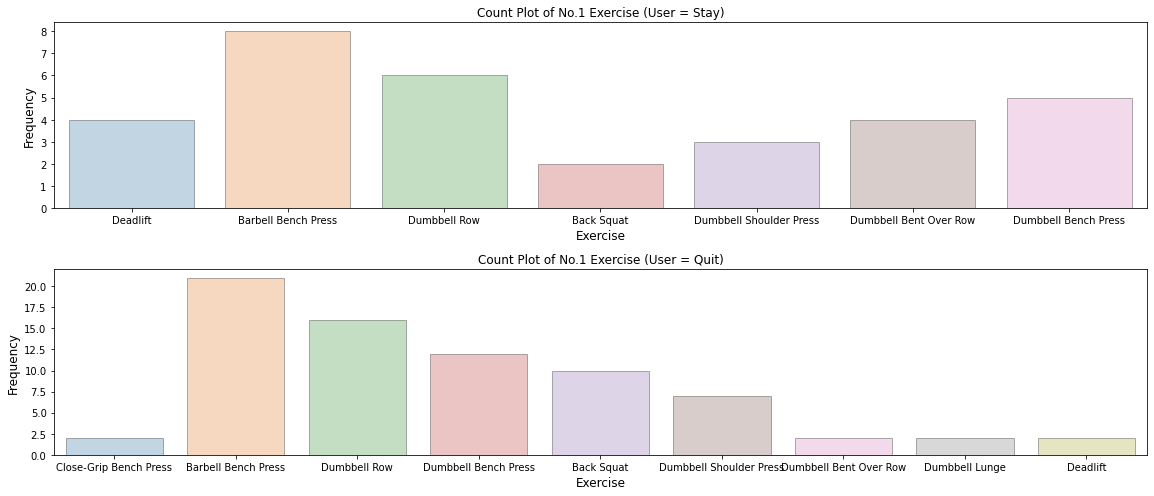

In [46]:
# Visualization
hist_kws={'edgecolor':'black', 'alpha': 0.3}
fig, ax = plt.subplots(2,1, figsize=(16, 7))
sns.countplot(df[df['quit']==0]['exercise1'], 
             label='Stay', ax=ax[0], **hist_kws)
ax[0].set_xlabel('Exercise', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)
ax[0].set_title('Count Plot of No.1 Exercise (User = Stay)')

sns.countplot(df[df['quit']==1]['exercise1'], 
             label='Quit', ax=ax[1], **hist_kws)
ax[1].set_xlabel('Exercise', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)
ax[1].set_title('Count Plot of No.1 Exercise (User = Quit)')
plt.tight_layout()
plt.show()

### Summary

1. The active days for a user has become the most important factor for quitting or not. Other measurable quitting factors can be short usage time a day, long interval of usage.
    1. for the quit user group, half of them have fewer than 25 active days.

2. The metric I want to measure relevant to this model is the `customer churn rate`, or `attrition rate`. It is how many users are lost during a time period.

3. The model has a __F1__ score of around 0.59, which is acceptable but not satisfactory.
4. The other major findings are that:
    1. we have a surge in `weekly/monthly active users` in the first half of 2019.
    2. a lot of of users quit in March, April and May in 2020; this can be caused by the Covid-19. 
    3. We should take the chance to keep the users during the quarantine time.